In [50]:
import pandas as pd

In [51]:
x = "hello world"
print("The variable x has a value : ", x)

The variable x has a value :  hello world


[ 5 15 25 35 45] [1 2 3 4 5]


(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([ 5.,  9., 13., 17., 21., 25., 29., 33., 37., 41., 45.]),
 <BarContainer object of 10 artists>)

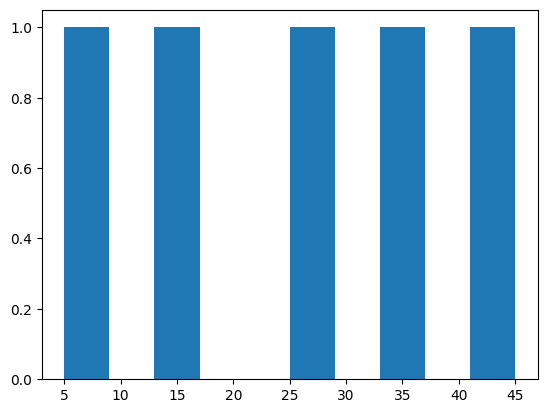

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [1, 2, 3, 4, 5]
y = [5, 15, 25, 35, 45]

x_array = np.array(x)
y_array = np.array(y)

print(y_array, x_array)

plt.hist(y)

In [53]:
nasdaq_top_companies = [
    {
        "Ticker": "AAPL",
        "Company": "Apple Inc.",
        "Industry": "Technology",
        "Market Cap": "Trillion Dollars",
        "Share_Price": 150.00,
        "Description": "Share price for Apple Inc. in September 2021"
    },
    {
        "Ticker": "MSFT",
        "Company": "Microsoft Corporation",
        "Industry": "Technology",
        "Market Cap": "Trillion Dollars",
        "Share_Price": 300.00,
        "Description": "Share price for Microsoft Corporation in September 2021"
    },
    {
        "Ticker": "AMZN",
        "Company": "Amazon.com Inc.",
        "Industry": "E-commerce",
        "Market Cap": "Trillion Dollars",
        "Share_Price": 3400.00,
        "Description": "Share price for Amazon.com Inc. in September 2021"
    },
    {
        "Ticker": "GOOGL",
        "Company": "Alphabet Inc. (Google)",
        "Industry": "Technology",
        "Market Cap": "Trillion Dollars",
        "Share_Price": 2700.00,
        "Description": "Share price for Alphabet Inc. in September 2021"
    },
    {
        "Ticker": "FB",
        "Company": "Meta Platforms, Inc. (Facebook)",
        "Industry": "Social Media",
        "Market Cap": "Trillion Dollars",
        "Share_Price": 330.00,
        "Description": "Share price for Meta Platforms, Inc. in September 2021"
    }
]
# Load dict to DataFrame
df_nasdaq=pd.DataFrame(nasdaq_top_companies)
print(df_nasdaq)

  Ticker                          Company      Industry        Market Cap  \
0   AAPL                       Apple Inc.    Technology  Trillion Dollars   
1   MSFT            Microsoft Corporation    Technology  Trillion Dollars   
2   AMZN                  Amazon.com Inc.    E-commerce  Trillion Dollars   
3  GOOGL           Alphabet Inc. (Google)    Technology  Trillion Dollars   
4     FB  Meta Platforms, Inc. (Facebook)  Social Media  Trillion Dollars   

   Share_Price                                        Description  
0        150.0       Share price for Apple Inc. in September 2021  
1        300.0  Share price for Microsoft Corporation in Septe...  
2       3400.0  Share price for Amazon.com Inc. in September 2021  
3       2700.0    Share price for Alphabet Inc. in September 2021  
4        330.0  Share price for Meta Platforms, Inc. in Septem...  


In [54]:
df_nasdaq

,Ticker,Company,Industry,Market Cap,Share_Price,Description
0,AAPL,Apple Inc.,Technology,Trillion Dollars,150.0,Share price for Apple Inc. in September 2021
1,MSFT,Microsoft Corporation,Technology,Trillion Dollars,300.0,Share price for Microsoft Corporation in Septe...
2,AMZN,Amazon.com Inc.,E-commerce,Trillion Dollars,3400.0,Share price for Amazon.com Inc. in September 2021
3,GOOGL,Alphabet Inc. (Google),Technology,Trillion Dollars,2700.0,Share price for Alphabet Inc. in September 2021
4,FB,"Meta Platforms, Inc. (Facebook)",Social Media,Trillion Dollars,330.0,"Share price for Meta Platforms, Inc. in Septem..."


In [55]:
import os
import glob

os.mkdir(r'./MARKET_DATA/')

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: './MARKET_DATA/'

In [34]:
def CreateCsvFile(df, PrefixName: str):
    '''
    The function CreateCsvFile enables to create multiple csv files by tickers 
    from a dataframe and a prefix as the filename.
    '''
    for line, ticker in zip(df['Ticker'], df['Ticker']):
        pathName = r'./MARKET_DATA/'+ str(PrefixName) +str(ticker)+'.csv'
        df[df['Ticker']==line].to_csv(pathName, index=False)
        print(pathName)
    return None



In [36]:
x = CreateCsvFile(df_nasdaq, 'NASDAQ_')

./MARKET_DATA/NASDAQ_AAPL.csv
./MARKET_DATA/NASDAQ_MSFT.csv
./MARKET_DATA/NASDAQ_AMZN.csv
./MARKET_DATA/NASDAQ_GOOGL.csv
./MARKET_DATA/NASDAQ_FB.csv


In [38]:
print(x)


None


In [41]:
# Assign the folder to parse
pathFolder = r'.\MARKET_DATA'
# Parse the folder
walkFolder = [path[0] for path in os.walk (pathFolder)]
# Initialize list
listOfFile = []
# Loop on the folder
for folder in walkFolder:
    # Assign folder path
    folderName = os.path.basename(folder)
    # Assign folder path joined to a file type searched
    files = os.path.join(folder, 'NASDAQ_*.csv')
    # Store the file path matching the file type searched
    listOfFile = glob.glob(files)

In [42]:
listOfFile

['.\\MARKET_DATA\\NASDAQ_AAPL.csv',
 '.\\MARKET_DATA\\NASDAQ_AMZN.csv',
 '.\\MARKET_DATA\\NASDAQ_FB.csv',
 '.\\MARKET_DATA\\NASDAQ_GOOGL.csv',
 '.\\MARKET_DATA\\NASDAQ_MSFT.csv']

In [43]:
# Initialize list
full_list = []
# Loop on all files
for file in listOfFile:
    # Import data to a Dataframe
    full_file = pd.read_csv(file, dtype = str).reset_index(drop = True)
    # Assign the file path to the file_name columns
    full_file['file_name']=os.path.basename(file)
    # Append the DataFrame to the list initialized
    full_list.append(full_file)
# Merge the list of DataFrames to a single DataFrame
fileConcat = pd.concat(full_list)

In [58]:
print(full_list)
print(fileConcat)

[  Ticker     Company    Industry        Market Cap Share_Price  \
0   AAPL  Apple Inc.  Technology  Trillion Dollars       150.0   

                                    Description        file_name  
0  Share price for Apple Inc. in September 2021  NASDAQ_AAPL.csv  ,   Ticker          Company    Industry        Market Cap Share_Price  \
0   AMZN  Amazon.com Inc.  E-commerce  Trillion Dollars      3400.0   

                                         Description        file_name  
0  Share price for Amazon.com Inc. in September 2021  NASDAQ_AMZN.csv  ,   Ticker                          Company      Industry        Market Cap  \
0     FB  Meta Platforms, Inc. (Facebook)  Social Media  Trillion Dollars   

  Share_Price                                        Description  \
0       330.0  Share price for Meta Platforms, Inc. in Septem...   

       file_name  
0  NASDAQ_FB.csv  ,   Ticker                 Company    Industry        Market Cap Share_Price  \
0  GOOGL  Alphabet Inc. (Google)  